<a href="https://colab.research.google.com/github/Omorusi/MachineLearning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

https://github.com/aayush301/machine-learning-basics/blob/main/09-KNN.ipynb

Analysing The data

In [ ]:
# diabetes datasets
import pandas as pd

data = pd.read_csv('/content/diabetes.csv',header=None)
data.head() # add names to the columns


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# added names to the columns
data.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Checking the amount of data of the dataset
rows, columns = data.shape

print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 768 rows and 9 columns.


In [ ]:
data_target = data['Outcome'].map({0:"Non-Diabetes" , 1:"Diabetes"})
data_target.head()

,Outcome
0,Diabetes
1,Non-Diabetes
2,Diabetes
3,Non-Diabetes
4,Diabetes


<ipython-input-6-c418a7b429a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Outcome"], palette=["blue", "red"])


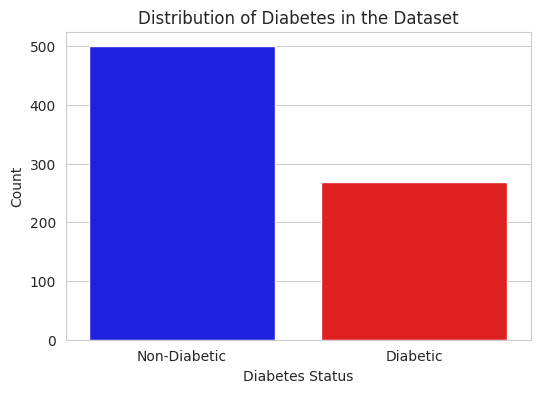

In [ ]:
#Display the Non-Diabetes vs Diabetes basesd on the Column['Outcome']
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Countplot of Outcome (Diabetes vs. Non-Diabetes)
plt.figure(figsize=(6, 4))
sns.countplot(x=data["Outcome"], palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.title("Distribution of Diabetes in the Dataset")

# Show plot
plt.show()


In [ ]:
# Split dataset into diabetic and non-diabetic groups
data0 =  data[data["Outcome"]==0] #  Non-Diabetes
data1 =  data[data["Outcome"]==1] # Diabetes

<Figure size 800x600 with 0 Axes>

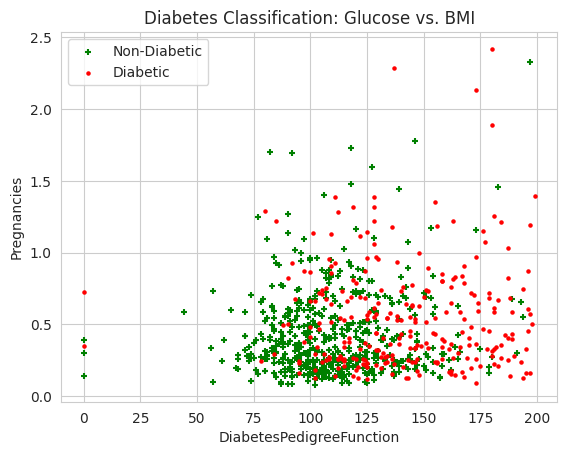

In [ ]:

# Scatter plot: Glucose vs. BMI
plt.figure(figsize=(8, 6))
ax = data0.plot.scatter("Glucose", "DiabetesPedigreeFunction", marker='+', color="green", label="Non-Diabetic")
ax = data1.plot.scatter("Glucose", "DiabetesPedigreeFunction", marker='.', color="red", ax=ax, label="Diabetic")

# Labels and title
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Pregnancies")
plt.title("Diabetes Classification: Glucose vs. BMI")
plt.legend()

# Show plot
plt.show()

In [ ]:
X = data.drop(["Outcome"], axis=1)  # Drop target column
Y = data["Outcome"]  # Keep target values


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
mymodel = KNeighborsClassifier(n_neighbors=3)
mymodel.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
mymodel.score(X_test, Y_test)

0.6753246753246753

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Handle Missing Values (if any) - Replace zeros in certain columns with median
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_replace:
    data[col] = data[col].replace(0, data[col].median())

# Step 2: Splitting Dataset into Features (X) and Target (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Step 3: Splitting into Training and Testing Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scaling Features (KNN is distance-based, so scaling is important)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Applying KNN Classifier with K=5 (default choice)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 6: Predictions
y_pred = knn.predict(X_test_scaled)

# Step 7: Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report